In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
tr = pd.read_csv('bankruptcy_Train.csv')
te = pd.read_csv('bankruptcy_Test_X.csv')

sample_sub = pd.read_csv('bankruptcy_sample_submission.csv')

In [3]:
target = tr[['class']]
tr.drop(['class'],axis = 1,inplace = True)

In [13]:
final_cols = ['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7',
       'Attr8', 'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14',
       'Attr15', 'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20',
       'Attr21', 'Attr22', 'Attr23', 'Attr24', 'Attr25', 'Attr26',
       'Attr27', 'Attr28', 'Attr29', 'Attr30', 'Attr31', 'Attr32',
       'Attr33', 'Attr34', 'Attr35', 'Attr36', 'Attr37', 'Attr38',
       'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43', 'Attr44',
       'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56',
       'Attr57', 'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62',
       'Attr63', 'Attr64']

final_cols = [
'Attr46',
'Attr25',
'Attr34',
'Attr26',
'Attr35',
'Attr24',
'Attr32',
'Attr9',
'Attr15',
'Attr51',
'Attr61',
'Attr52',
'Attr55',
'Attr38',
'Attr4',
'Attr56',
'Attr21',
'Attr5',
'Attr58',
'Attr36',
'Attr54',
'Attr64',
'Attr31',
'Attr29',
'Attr63',
'Attr3',
'Attr1',
'Attr44',
'Attr39',
'Attr27',
'Attr40',
'Attr6',
'Attr48',
'Attr62',
'Attr49',
'Attr22',
'Attr11',
'Attr42',
'Attr10',
'Attr16',
'Attr53',
'Attr30',
'Attr45',
'Attr47',
'Attr41',
'Attr60']


In [14]:
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier 
from sklearn.metrics import roc_auc_score as auc

In [15]:
n_folds = 5
folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=9966)
CV_score = []
oof = np.zeros(len(tr))
importances = np.zeros(len(final_cols))
predictions = np.zeros(len(te))
for fold_, (trn_idx, val_idx) in (enumerate(folds.split(tr.values, target.values))):
        
    trn_data, trn_y = tr[final_cols].iloc[trn_idx].values, target.iloc[trn_idx].values
    val_data, val_y = tr[final_cols].iloc[val_idx].values, target.iloc[val_idx].values
        
    params = {'num_leaves': 100,
      'objective': 'binary',
      'max_depth': 6,
      'learning_rate': 0.001,
      "boosting_type": "gbdt",
      "subsample_freq": 1,
      "subsample": 0.8,
      "metric": 'auc',
      "verbosity": -1,
      'lambda_l1': 0.1,
      'lambda_l2': 0.2,	
      'feature_fraction': 0.9,
      'n_estimators' : 10000,
      'n_jobs' : -1
     }
    
    clf = LGBMClassifier(**params)
        
    clf = clf.fit(trn_data, trn_y,early_stopping_rounds=500,eval_set=[(trn_data, trn_y), (val_data, val_y)],verbose = 500,eval_metric = 'auc')
    clf.fit(trn_data,trn_y)
    val_pred = clf.predict_proba(val_data)[:,1]
    oof[val_idx] = val_pred
    AUC = auc(val_y,val_pred)
    CV_score.append(AUC) 

    predictions += clf.predict_proba(te[final_cols])[:,1] / n_folds
        
    importances += clf.feature_importances_ /n_folds   

    
print('CV_mean: ' + str(np.mean(CV_score))+ ' CV_std: ' + str(np.std(CV_score)))
    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training until validation scores don't improve for 500 rounds.
[500]	valid_0's auc: 0.994038	valid_1's auc: 0.927214
[1000]	valid_0's auc: 0.997002	valid_1's auc: 0.92763
Early stopping, best iteration is:
[755]	valid_0's auc: 0.996019	valid_1's auc: 0.928034


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

Training until validation scores don't improve for 500 rounds.
[500]	valid_0's auc: 0.994805	valid_1's auc: 0.902829
[1000]	valid_0's auc: 0.997832	valid_1's auc: 0.911992
[1500]	valid_0's auc: 0.998914	valid_1's auc: 0.915212
[2000]	valid_0's auc: 0.999384	valid_1's auc: 0.9181
[2500]	valid_0's auc: 0.999661	valid_1's auc: 0.920952
[3000]	valid_0's auc: 0.999806	valid_1's auc: 0.923673
[3500]	valid_0's auc: 0.999895	valid_1's auc: 0.925158
[4000]	valid_0's auc: 0.999949	valid_1's auc: 0.926703
[4500]	valid_0's auc: 0.99997	valid_1's auc: 0.927737
[5000]	valid_0's auc: 0.999989	valid_1's auc: 0.928462
[5500]	valid_0's auc: 0.999993	valid_1's auc: 0.929353
[6000]	valid_0's auc: 0.999996	valid_1's auc: 0.930435
[6500]	valid_0's auc: 0.999999	valid_1's auc: 0.930886
Early stopping, best iteration is:
[6224]	valid_0's auc: 0.999999	valid_1's auc: 0.930613


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

Training until validation scores don't improve for 500 rounds.
[500]	valid_0's auc: 0.993008	valid_1's auc: 0.922384
[1000]	valid_0's auc: 0.996649	valid_1's auc: 0.931962
[1500]	valid_0's auc: 0.997927	valid_1's auc: 0.93583
[2000]	valid_0's auc: 0.998644	valid_1's auc: 0.938171
[2500]	valid_0's auc: 0.999143	valid_1's auc: 0.939775
[3000]	valid_0's auc: 0.999533	valid_1's auc: 0.941142
[3500]	valid_0's auc: 0.999739	valid_1's auc: 0.942152
[4000]	valid_0's auc: 0.999862	valid_1's auc: 0.943043
[4500]	valid_0's auc: 0.999938	valid_1's auc: 0.943447
Early stopping, best iteration is:
[4448]	valid_0's auc: 0.999933	valid_1's auc: 0.943601


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

Training until validation scores don't improve for 500 rounds.
[500]	valid_0's auc: 0.992034	valid_1's auc: 0.938242
[1000]	valid_0's auc: 0.996402	valid_1's auc: 0.942817
[1500]	valid_0's auc: 0.998053	valid_1's auc: 0.944303
[2000]	valid_0's auc: 0.998855	valid_1's auc: 0.945146
[2500]	valid_0's auc: 0.99938	valid_1's auc: 0.94675
[3000]	valid_0's auc: 0.999645	valid_1's auc: 0.947915
[3500]	valid_0's auc: 0.999839	valid_1's auc: 0.949377
[4000]	valid_0's auc: 0.999923	valid_1's auc: 0.95047
[4500]	valid_0's auc: 0.999959	valid_1's auc: 0.951397
[5000]	valid_0's auc: 0.999981	valid_1's auc: 0.951837
[5500]	valid_0's auc: 0.999988	valid_1's auc: 0.9523
[6000]	valid_0's auc: 0.999993	valid_1's auc: 0.952645
[6500]	valid_0's auc: 0.999997	valid_1's auc: 0.953037
[7000]	valid_0's auc: 0.999999	valid_1's auc: 0.953274
[7500]	valid_0's auc: 0.999999	valid_1's auc: 0.953334
Early stopping, best iteration is:
[7004]	valid_0's auc: 0.999999	valid_1's auc: 0.953286


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

Training until validation scores don't improve for 500 rounds.
[500]	valid_0's auc: 0.992158	valid_1's auc: 0.907369
[1000]	valid_0's auc: 0.99697	valid_1's auc: 0.924267
[1500]	valid_0's auc: 0.998645	valid_1's auc: 0.931053
[2000]	valid_0's auc: 0.999299	valid_1's auc: 0.935556
[2500]	valid_0's auc: 0.999655	valid_1's auc: 0.93804
[3000]	valid_0's auc: 0.999849	valid_1's auc: 0.939157
[3500]	valid_0's auc: 0.999941	valid_1's auc: 0.940167
[4000]	valid_0's auc: 0.999979	valid_1's auc: 0.941367
[4500]	valid_0's auc: 0.99999	valid_1's auc: 0.942235
[5000]	valid_0's auc: 0.999994	valid_1's auc: 0.942579
[5500]	valid_0's auc: 0.999998	valid_1's auc: 0.943138
[6000]	valid_0's auc: 1	valid_1's auc: 0.943637
Early stopping, best iteration is:
[5992]	valid_0's auc: 1	valid_1's auc: 0.943649


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CV_mean: 0.9452080189183729 CV_std: 0.0065639685485055655


In [19]:
sample_sub['class'] = predictions
sample_sub.to_csv('pred_lgbm_cv_0945208.csv',index = False)

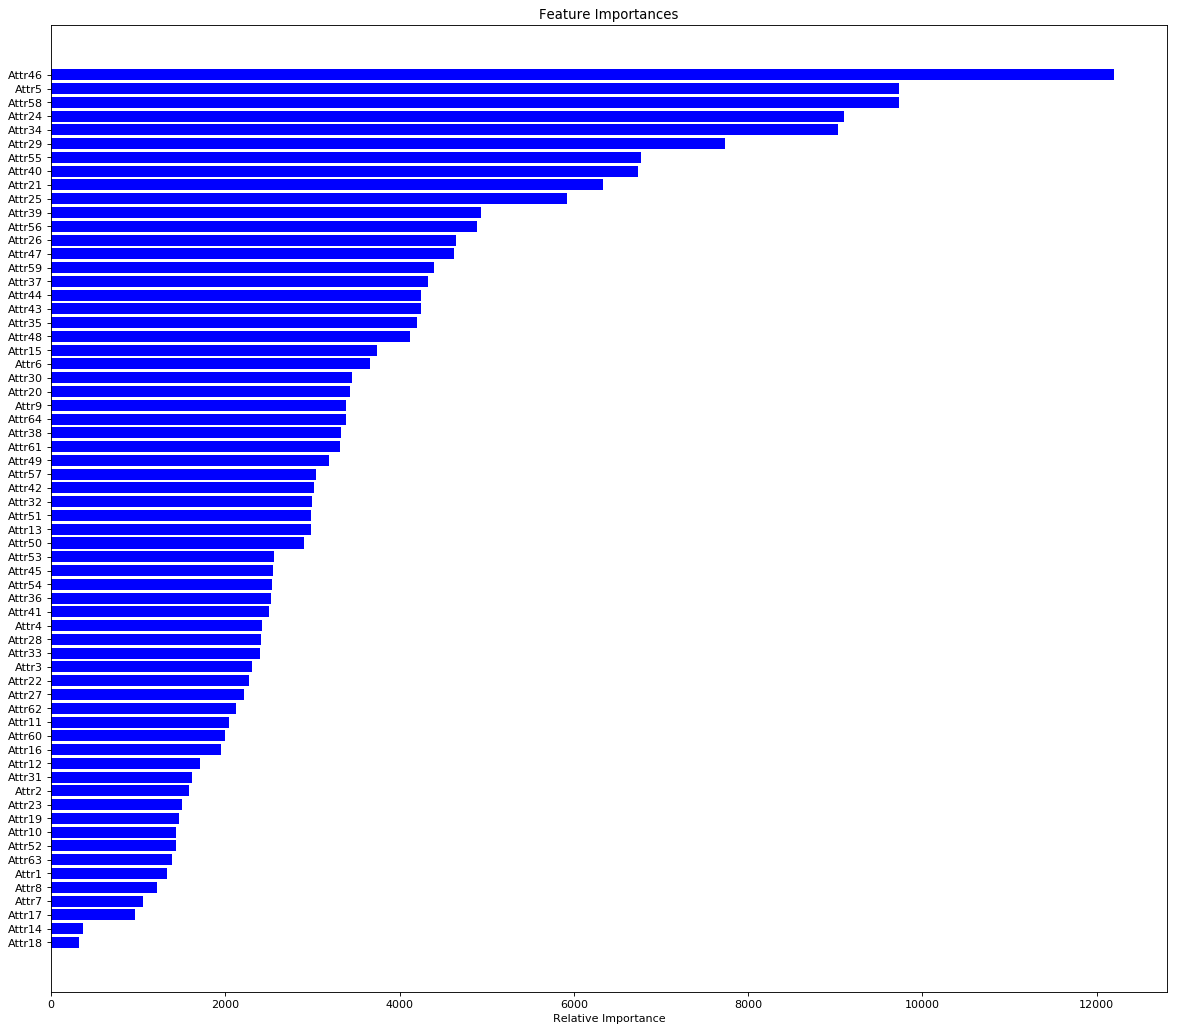

In [8]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [final_cols[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [10]:
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import train_test_split


my_model = RandomForestRegressor(random_state = 0).fit(tr[final_cols],target)
perm =  PermutationImportance(my_model,random_state = 111).fit(tr[final_cols],target)
eli5.show_weights(perm,feature_names = tr[final_cols].columns.tolist(),top = len(tr[final_cols].columns.values))



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Weight,Feature
0.5067 ± 0.0391,Attr46
0.4737 ± 0.0147,Attr25
0.4120 ± 0.0485,Attr34
0.3408 ± 0.0150,Attr26
0.1976 ± 0.0077,Attr35
0.1931 ± 0.0165,Attr24
0.1668 ± 0.0065,Attr32
0.1620 ± 0.0076,Attr9
0.1391 ± 0.0091,Attr15
0.1129 ± 0.0083,Attr51
